In [2]:
#https://www.studocu.com/vn/document/hoc-vien-ngan-hang/hoc-vien-ngan-hang/chuong-6-huong-dan-thuc-hanh-nhan-dien-anh-cnn/27469997
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from traitlets.traitlets import validate
import os
train_image_files_path = '/content/drive/My Drive/TEACHING/GoogleColab/train'
valid_image_files_path = '/content/drive/My Drive/TEACHING/GoogleColab/valid'



In [5]:
label =['apple', 'banana']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1/255)
valid_data_gen = ImageDataGenerator(rescale = 1/255)
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (50,50),
    class_mode = 'categorical'
)
valid_generator = train_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (50,50),
    class_mode = 'categorical'
)

Found 143 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = tf.keras.models.Sequential()

#CNN1 Layer
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (50,50,3)))
model.add(MaxPooling2D(2,2))

#CNN2 Layer
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

#Hidden layer
model.add(Dense(512, activation = tf.nn.relu))

#Output layer: 2 categories
model.add(Dense(2, activation = tf.nn.softmax))


In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics= ['acc'])


In [15]:
EPOCHS = 10
history = model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs= EPOCHS,
    verbose = 1,
    validation_data = valid_generator,
    validation_steps = 1
)

Epoch 1/10
2/2 [==============================] - 5s 3s/step - loss: 0.5415 - acc: 0.7188 - val_loss: 0.3913 - val_acc: 0.8947
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.3718 - acc: 0.8906 - val_loss: 0.2993 - val_acc: 0.8421
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.5054 - acc: 0.7188 - val_loss: 0.7834 - val_acc: 0.5263
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 0.6666 - acc: 0.6406 - val_loss: 0.3506 - val_acc: 0.8947
Epoch 5/10
2/2 [==============================] - 5s 5s/step - loss: 0.3513 - acc: 0.8723 - val_loss: 0.2985 - val_acc: 0.8421
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.3455 - acc: 0.8298 - val_loss: 0.2802 - val_acc: 0.8947
Epoch 7/10
2/2 [==============================] - 4s 3s/step - loss: 0.3399 - acc: 0.8298 - val_loss: 0.5672 - val_acc: 0.8421
Epoch 8/10
2/2 [==============================] - 5s 3s/step - loss: 0.4390 - acc: 0.7812 - val_loss: 0.2517 - 

Saving Image_3.jpg to Image_3.jpg
1/1 [==============================] - 0s 28ms/step
[[1.1819447e-28 1.0000000e+00]]
Giá trị dự đoán banana


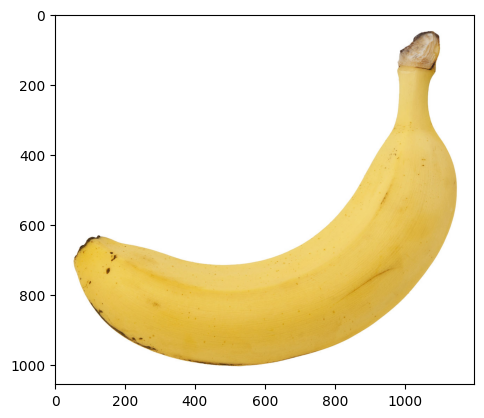

In [14]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  plt.imshow(mping.imread(path))

  img = image.load_img(path, target_size = (50,50))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  y_predict = model.predict(images, batch_size = 10)
  print(y_predict)
  print('Giá trị dự đoán', label[np.argmax(y_predict)])